In [256]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


In [257]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [258]:
train_df = pd.read_csv("../../data/titanic_train.csv") 
test_df = pd.read_csv("../../data/titanic_test.csv") 

In [259]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smith, Mr. James Clinch",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [260]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [261]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [262]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Pclass'], 
                                               prefix="PClass"),
                      pd.get_dummies(train_df['Sex'], prefix="Sex"),
                      pd.get_dummies(train_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_df['Parch'], prefix="Parch"),
                     pd.get_dummies(train_df['Embarked'], prefix="Embarked")],
                     axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Pclass'], 
                                             prefix="PClass"),
                      pd.get_dummies(test_df['Sex'], prefix="Sex"),
                      pd.get_dummies(test_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(test_df['Parch'], prefix="Parch"),
                    pd.get_dummies(test_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [263]:
train_df.shape, test_df.shape

((891, 34), (418, 34))

In [264]:
All = train_df.shape[0]
Surv = train_df[(train_df.Survived == 1)].shape[0]

Surv/All

0.3838383838383838

In [265]:
All

891

In [266]:
Surv

342

In [267]:
FemaleSurv = train_df[(train_df.Survived == 1) & (train_df.Sex != 'male')].shape[0]
MaleSurv = train_df[(train_df.Survived == 1) & (train_df.Sex == 'male')].shape[0]

AllFirstPClass = train_df[(train_df.Pclass == 1)].shape[0]
AllSecondPClass = train_df[(train_df.Pclass == 2)].shape[0]
AllThrPClass = train_df[(train_df.Pclass == 3)].shape[0]

FirstPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1)].shape[0]
SecondPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2)].shape[0]
ThrPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3)].shape[0]

YangSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30)].shape[0]
OldSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30)].shape[0]

YangWoSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]


YangWoFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]
YangWoSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]
YangWoThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]


In [268]:
YangWoFi

44

In [269]:
T = (YangWoFi + OldWoFi + YangMeFi + OldMeFi + 
YangWoSe + OldWoSe + YangMeSe + OldMeSe + 
YangWoTh + OldWoTh + YangMeTh + OldMeTh)

T

891

In [270]:
Surv == (YangWoFiSurv + OldWoFiSurv + YangMeFiSurv + OldMeFiSurv + 
YangWoSeSurv + OldWoSeSurv + YangMeSeSurv + OldMeSeSurv + 
YangWoThSurv + OldWoThSurv + YangMeThSurv + OldMeThSurv)

True

In [271]:
Ya1WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

Ya1WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

Ya1WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]


In [272]:
All == (Ya1WoFi + Ya1MeFi + Ya1WoSe + Ya1MeSe + Ya1WoTh + Ya1MeTh +
        Ya2WoFi + Ya2MeFi + Ya2WoSe + Ya2MeSe + Ya2WoTh + Ya2MeTh +
        Ya3WoFi + Ya3MeFi + Ya3WoSe + Ya3MeSe + Ya3WoTh + Ya3MeTh +
        Ya4WoFi + Ya4MeFi + Ya4WoSe + Ya4MeSe + Ya4WoTh + Ya4MeTh +
        Ya5WoFi + Ya5MeFi + Ya5WoSe + Ya5MeSe + Ya5WoTh + Ya5MeTh)


True

In [273]:
SurvYa1WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

SurvYa1WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

SurvYa1WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]


In [274]:
Surv == (SurvYa1WoFi + SurvYa1MeFi + SurvYa1WoSe + SurvYa1MeSe + SurvYa1WoTh + SurvYa1MeTh +
        SurvYa2WoFi + SurvYa2MeFi + SurvYa2WoSe + SurvYa2MeSe + SurvYa2WoTh + SurvYa2MeTh +
        SurvYa3WoFi + SurvYa3MeFi + SurvYa3WoSe + SurvYa3MeSe + SurvYa3WoTh + SurvYa3MeTh +
        SurvYa4WoFi + SurvYa4MeFi + SurvYa4WoSe + SurvYa4MeSe + SurvYa4WoTh + SurvYa4MeTh +
        SurvYa5WoFi + SurvYa5MeFi + SurvYa5WoSe + SurvYa5MeSe + SurvYa5WoTh + SurvYa5MeTh)

True

In [275]:
All

891

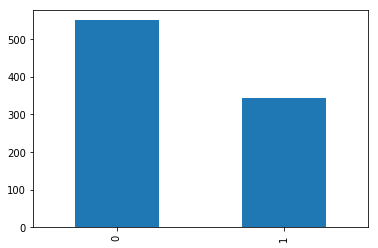

In [276]:
train_df['Survived'].value_counts().plot(kind='bar',label='Survived')

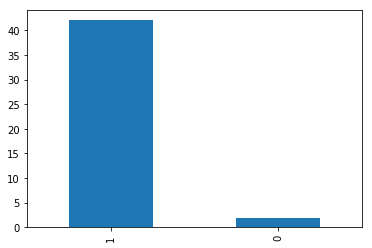

In [277]:
YangWoFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')]
YangWoSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex == 'male')]
YangWoTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex == 'male')]

YangWoFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangWoSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangWoTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')

In [278]:
Surv == (YangWoFiSurv + OldWoFiSurv + YangMeFiSurv + OldMeFiSurv + 
YangWoSeSurv + OldWoSeSurv + YangMeSeSurv + OldMeSeSurv + 
YangWoThSurv + OldWoThSurv + YangMeThSurv + OldMeThSurv)

True

In [279]:
All == (YangWoFi + OldWoFi + YangMeFi + OldMeFi + 
YangWoSe + OldWoSe + YangMeSe + OldMeSe + 
YangWoTh + OldWoTh + YangMeTh + OldMeTh)

True

In [280]:
Surv/All

0.3838383838383838

In [281]:
def prognoz(a=0.383838383838):
    k = random.random()
    if a > k:
        #print("survived")
        return 1
    else:
        #print("not survived")
        return 0
    pass

In [282]:
train_df['PSurv'] = Surv/All

test_df['PSurv'] = Surv/All


In [283]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0.383838
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0.383838
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,0.383838
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,0.383838
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,0.383838


##### Выделяем 30 групп

In [284]:
warnings.filterwarnings('ignore')

In [285]:
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoFi/Ya1WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoFi/Ya2WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoFi/Ya3WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoFi/Ya4WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 40) & (test_df.Sex != 'male')] = Ya5WoFi/Ya5WoFi

test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = Ya1MeFi/Ya1MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeFi/Ya2MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeFi/Ya3MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = SurvYa4MeFi/Ya4MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeFi/Ya5MeFi

test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoSe/Ya1WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoSe/Ya2WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoSe/Ya3WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoSe/Ya4WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 40) & (test_df.Sex != 'male')] = SurvYa5WoSe/Ya5WoSe

test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = SurvYa1MeSe/Ya1MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeSe/Ya2MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeSe/Ya3MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = Ya4MeSe/Ya4MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeSe/Ya5MeSe

test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoTh/Ya1WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoTh/Ya2WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoTh/Ya3WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoTh/Ya4WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 40) & (test_df.Sex != 'male')] = SurvYa5WoTh/Ya5WoTh

test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = SurvYa1MeTh/Ya1MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeTh/Ya2MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeTh/Ya3MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = SurvYa4MeTh/Ya4MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeTh/Ya5MeTh


In [286]:
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex != 'male')] = SurvYa1WoFi/Ya1WoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')] = SurvYa2WoFi/Ya2WoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = SurvYa3WoFi/Ya3WoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')] = SurvYa4WoFi/Ya4WoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex != 'male')] = Ya5WoFi/Ya5WoFi

train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex == 'male')] = Ya1MeFi/Ya1MeFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')] = SurvYa2MeFi/Ya2MeFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = SurvYa3MeFi/Ya3MeFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')] = SurvYa4MeFi/Ya4MeFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex == 'male')] = SurvYa5MeFi/Ya5MeFi

train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex != 'male')] = SurvYa1WoSe/Ya1WoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')] = SurvYa2WoSe/Ya2WoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = SurvYa3WoSe/Ya3WoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')] = SurvYa4WoSe/Ya4WoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex != 'male')] = SurvYa5WoSe/Ya5WoSe

train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex == 'male')] = SurvYa1MeSe/Ya1MeSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')] = SurvYa2MeSe/Ya2MeSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = SurvYa3MeSe/Ya3MeSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')] = Ya4MeSe/Ya4MeSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex == 'male')] = SurvYa5MeSe/Ya5MeSe

train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex != 'male')] = SurvYa1WoTh/Ya1WoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')] = SurvYa2WoTh/Ya2WoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = SurvYa3WoTh/Ya3WoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')] = SurvYa4WoTh/Ya4WoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex != 'male')] = SurvYa5WoTh/Ya5WoTh

train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex == 'male')] = SurvYa1MeTh/Ya1MeTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')] = SurvYa2MeTh/Ya2MeTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = SurvYa3MeTh/Ya3MeTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')] = SurvYa4MeTh/Ya4MeTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex == 'male')] = SurvYa5MeTh/Ya5MeTh


In [287]:
SurvYa5WoTh/Ya5WoTh

0.1111111111111111

##### Выделяем 12 групп 

In [586]:
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoFiSurv/YangWoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoFiSurv/OldWoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeFiSurv/YangMeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeFiSurv/OldMeFi
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoSeSurv/YangWoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoSeSurv/OldWoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeSeSurv/YangMeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeSeSurv/OldMeSe
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoThSurv/YangWoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoThSurv/OldWoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeThSurv/YangMeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeThSurv/OldMeTh

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [587]:
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = YangWoFiSurv/YangWoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')] = OldWoFiSurv/OldWoFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = YangMeFiSurv/YangMeFi
train_df.PSurv[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')] = OldMeFiSurv/OldMeFi
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = YangWoSeSurv/YangWoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex != 'male')] = OldWoSeSurv/OldWoSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = YangMeSeSurv/YangMeSe
train_df.PSurv[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex == 'male')] = OldMeSeSurv/OldMeSe
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex != 'male')] = YangWoThSurv/YangWoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex != 'male')] = OldWoThSurv/OldWoTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex == 'male')] = YangMeThSurv/YangMeTh
train_df.PSurv[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex == 'male')] = OldMeThSurv/OldMeTh

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0.120419
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,0.554054
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,1.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,0.142857


In [288]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,1,0,0.142857
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,1,0.111111
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,1,0,0.095238
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,1,0.120419
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,0,0,0,0,0,1,0.554054


In [289]:
train_df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 
               'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
              axis=1, inplace=True)
test_df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
             axis=1, inplace=True)

In [290]:
train_df.shape, test_df.shape

((891, 26), (418, 26))

In [291]:
y = train_df['Survived'].astype('int')
X = train_df.drop('Survived', axis=1)
y. shape, X.shape

((891,), (891, 25))

In [292]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [293]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=17)

In [294]:
my_tree = DecisionTreeClassifier(random_state=17)

In [295]:
np.mean(cross_val_score(my_tree, X_train, y_train, cv=9))

0.7907623787370622

In [296]:
my_tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 17,
 'splitter': 'best'}

In [103]:
my_tree.fit(X,y)
answer = second_tree.predict(X_test)

In [297]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [298]:
def fit_estimator(estimator):
    return cross_val_score(estimator, X, y, cv=10).mean()
       

In [299]:
fit_estimator(second_tree)

0.81719923958688

In [300]:
bagging = BaggingClassifier(base_estimator=my_tree, random_state=11, n_estimators=300)
fit_estimator(bagging)


0.8149773011008966

In [301]:
bagging = BaggingClassifier(base_estimator=second_tree, random_state=11, n_estimators=300)
fit_estimator(bagging)


0.8283600045397799

In [302]:
est=second_tree

In [303]:
bagging = BaggingClassifier(base_estimator=est, random_state=11, n_estimators=300, max_features=int(X.shape[1]-3))
fit_estimator(bagging)

0.838497900351833

In [304]:
bagging.fit(X,y)
answer = bagging.predict(X_test)

In [305]:
est=second_tree

In [306]:
d_tree = DecisionTreeClassifier(random_state=37, max_features=int(np.sqrt(X.shape[1])))
bagging = BaggingClassifier(base_estimator=est, random_state=12, n_estimators=100)
fit_estimator(bagging)

0.8351143457042334

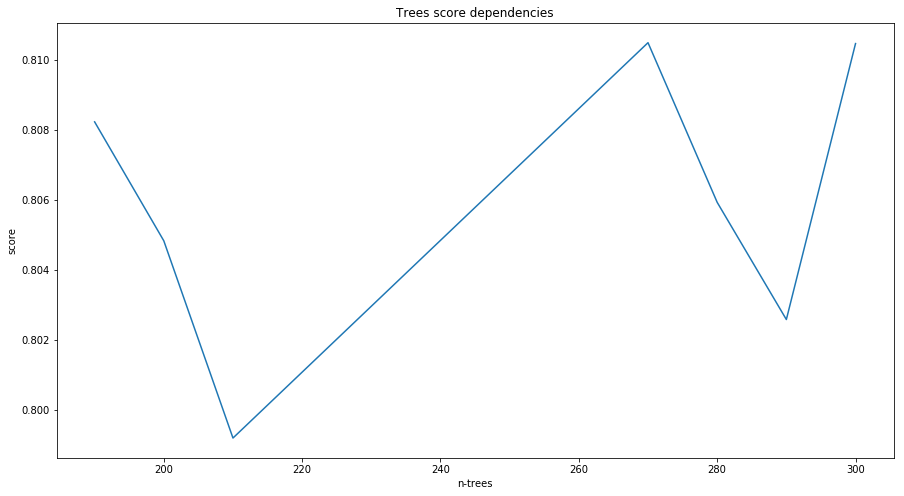

CPU times: user 46.3 s, sys: 647 ms, total: 46.9 s
Wall time: 46.5 s


In [308]:
%%time
def plot_rf_trees_score():
    trees = [190, 200, 210, 270, 280, 290, 300]
    results = []
    for tree in trees:
        rf = RandomForestClassifier(n_estimators=tree)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()

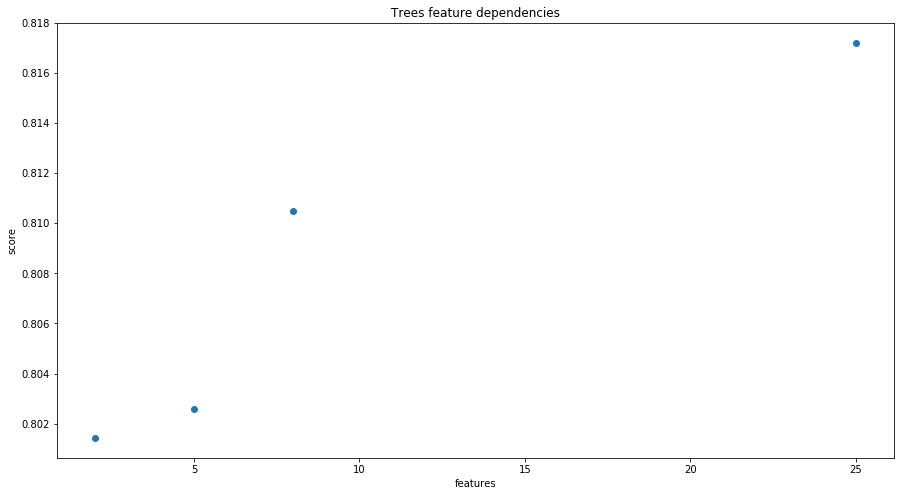

CPU times: user 1min 5s, sys: 808 ms, total: 1min 6s
Wall time: 1min 6s


In [97]:
%%time
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_features=f)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features() 

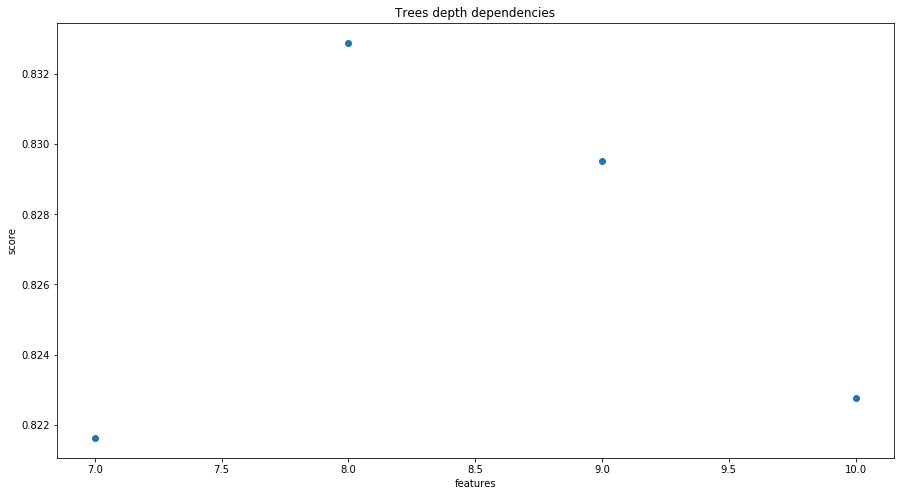

CPU times: user 57.9 s, sys: 892 ms, total: 58.8 s
Wall time: 58.3 s


In [101]:
%%time
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [7, 8, 9, 10]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_depth=d)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth()

In [311]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

print(X.shape, y.shape)

(891, 25) (891,)


In [310]:
[sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)])
                for x in X]

ValueError: could not convert string to float: 'Age'

In [312]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 25), (223, 25), (668,), (223,))

In [313]:
def gbm_predict(X):
	return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)])
                for x in range(X.shape[0])]

In [240]:
b = range(X.shape[0])
b.reshape(-1, 1)

AttributeError: 'range' object has no attribute 'reshape'

In [314]:
for x in X:
    print(x)

Age
Fare
PClass_1
PClass_2
PClass_3
Sex_female
Sex_male
SibSp_0
SibSp_1
SibSp_2
SibSp_3
SibSp_4
SibSp_5
SibSp_8
Parch_0
Parch_1
Parch_2
Parch_3
Parch_4
Parch_5
Parch_6
Embarked_C
Embarked_Q
Embarked_S
PSurv


In [315]:
gbm_predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [217]:
base_algorithms_list = []
coefficients_list = []
 
def get_grad():
    return [y - a for a, y in zip(gbm_predict(X_train), y_train) ]
    #or more simple return y_train - gbm_predict(X_train)

In [222]:
get_grad()

ValueError: Expected 2D array, got 1D array instead:
array=[0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [221]:
# не разобрался - http://artemarakcheev.com/2018-02-03/decision_trees_practics

for i in np.arange(0, 50):
    #create new algorithm 
    rg = DecisionTreeRegressor(random_state=42, max_depth=5)
#    fit algo in train dataset and new target
    rg.fit(X_train, get_grad())
    #append results    
    base_algorithms_list.append(rg)
    coefficients_list.append(0.9)
    
pred = gbm_predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))  

ValueError: Expected 2D array, got 1D array instead:
array=[0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [175]:
from xgboost import XGBRegressor

xbg = XGBRegressor(n_estimators=50, max_depth=5)
xbg.fit(X_train, y_train)
pred = xbg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

[19:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.3772181058967842

In [176]:
bagging.fit(X_train, y_train)
pred1 = bagging.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred1))

0.4287849137296606

In [177]:
fit_estimator(bagging)

0.838497900351833

In [178]:
fit_estimator(xbg)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.4553095189704237

In [620]:
train_df.corr()

,Survived,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
Survived,1.000000,-0.064910,0.257307,0.285904,0.093349,-0.322308,0.543351,-0.543351,-0.115867,0.173076,...,0.134174,0.075020,0.033391,-0.053002,-0.028398,-0.026456,0.168240,0.003650,-0.149683,0.632522
Age,-0.064910,1.000000,0.096688,0.323896,0.015831,-0.291955,-0.081163,0.081163,0.143102,0.019918,...,-0.141031,-0.254092,0.022160,0.078125,0.056798,0.035133,0.030248,-0.031415,-0.006729,0.032236
Fare,0.257307,0.096688,1.000000,0.591711,-0.118557,-0.413333,0.182333,-0.182333,-0.192190,0.133121,...,0.114650,0.203206,-0.009457,0.071344,0.000523,0.009918,0.269335,-0.117216,-0.162184,0.388419
PClass_1,0.285904,0.323896,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.098013,-0.058470,0.125673,...,0.018496,0.014713,-0.042496,0.001187,-0.042496,-0.018962,0.296423,-0.155342,-0.161921,0.452006
PClass_2,0.093349,0.015831,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.033099,0.077469,...,0.062425,-0.005051,0.035908,-0.034258,-0.038324,-0.017100,-0.125416,-0.127301,0.189980,0.147582
PClass_3,-0.322308,-0.291955,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.137143,0.077316,-0.171329,...,-0.066741,-0.008566,0.007391,0.026859,0.067804,0.030255,-0.153329,0.237449,-0.015104,-0.509561
Sex_female,0.543351,-0.081163,0.182333,0.098013,0.064746,-0.137143,1.000000,-1.000000,-0.203203,0.179339,...,0.127636,0.170993,0.070383,0.020746,0.070383,0.045439,0.082853,0.074115,-0.119224,0.859024
Sex_male,-0.543351,0.081163,-0.182333,-0.098013,-0.064746,0.137143,-1.000000,1.000000,0.203203,-0.179339,...,-0.127636,-0.170993,-0.070383,-0.020746,-0.070383,-0.045439,-0.082853,-0.074115,0.119224,-0.859024
SibSp_0,-0.115867,0.143102,-0.192190,-0.058470,-0.033099,0.077316,-0.203203,0.203203,1.000000,-0.811408,...,-0.302415,-0.215801,-0.077838,-0.062369,-0.045565,-0.049132,-0.034759,0.055398,-0.004412,-0.183716
SibSp_1,0.173076,0.019918,0.133121,0.125673,0.077469,-0.171329,0.179339,-0.179339,-0.811408,1.000000,...,0.229119,0.002173,0.064787,0.081687,0.064787,0.060551,0.092043,-0.066568,-0.038742,0.203390


In [56]:

X_test = test_df

In [704]:
#my_tree.fit(X, y)

In [705]:
my_tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 7,
 'splitter': 'best'}

In [353]:
test_df.shape, X.shape

((418, 25), (891, 25))

In [319]:
set(test_df.columns) - set(X.columns)

set()

In [318]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [621]:
#my_tree.fit(X,y)

In [62]:
my_tree.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
train_df.describe()

,Survived,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028,0.410774
std,0.486592,13.019697,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751,0.342653
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120419
50%,0.000000,28.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.280000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.554054
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
norm_train_df = train_df
norm_train_df = (norm_train_df - norm_train_df.mean()) / norm_train_df.std()

In [623]:
norm_train_df.head()

,Survived,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,-0.788829,-0.565419,-0.502163,-0.565368,-0.509865,0.902081,-0.737281,0.737281,-1.464923,1.805407,...,-0.390488,-0.3139,-0.07508,-0.067116,-0.07508,-0.033501,-0.481772,-0.30739,0.615493,-0.847374
1,1.266279,0.663488,0.786404,1.766775,-0.509865,-1.107304,1.354813,-1.354813,-1.464923,1.805407,...,-0.390488,-0.3139,-0.07508,-0.067116,-0.07508,-0.033501,2.073341,-0.30739,-1.622891,1.719597
2,1.266279,-0.258192,-0.488580,-0.565368,-0.509865,0.902081,1.354813,-1.354813,0.681864,-0.553270,...,-0.390488,-0.3139,-0.07508,-0.067116,-0.07508,-0.033501,-0.481772,-0.30739,0.615493,0.418148
3,1.266279,0.433068,0.420494,1.766775,-0.509865,-1.107304,1.354813,-1.354813,-1.464923,1.805407,...,-0.390488,-0.3139,-0.07508,-0.067116,-0.07508,-0.033501,-0.481772,-0.30739,0.615493,1.719597
4,-0.788829,0.433068,-0.486064,-0.565368,-0.509865,0.902081,-0.737281,0.737281,0.681864,-0.553270,...,-0.390488,-0.3139,-0.07508,-0.067116,-0.07508,-0.033501,-0.481772,-0.30739,0.615493,-0.781890


In [ ]:
y1 = norm_train_df['Survived'].astype('int')
X1 = norm_train_df.drop('Survived', axis=1)
y1. shape, X1.shape

In [322]:
from sklearn.neighbors import KNeighborsClassifier

In [323]:
my_knn = KNeighborsClassifier()

In [324]:
np.mean(cross_val_score(my_knn, X_train, y_train, cv=7))

0.7186626359713717

In [327]:
X_test = test_df

In [325]:
my_tree.predict(test_df, X)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [327]:
from sklearn.model_selection import GridSearchCV

In [328]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [329]:
tree_grid = GridSearchCV(my_tree, tree_params, cv=5, n_jobs=-1)

In [330]:
%%time
tree_grid.fit(X_train, y_train);

CPU times: user 489 ms, sys: 120 ms, total: 609 ms
Wall time: 4.74 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [331]:
tree_grid.best_score_, tree_grid.best_params_

(0.8233532934131736, {'max_depth': 6, 'max_features': 0.5})

In [332]:
knn_params = {'n_neighbors': range(5, 30, 5) }#+ list(range(50, 100, 10))}

In [333]:
knn_grid = GridSearchCV(my_knn, knn_params, cv=5)

In [334]:
%%time
knn_grid.fit(X_train, y_train);

CPU times: user 430 ms, sys: 13 µs, total: 430 ms
Wall time: 438 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(5, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [335]:
knn_grid.best_score_, knn_grid.best_params_

(0.7290419161676647, {'n_neighbors': 5})

In [336]:
tree_valid_pred = tree_grid.predict(X_valid)

In [337]:
from sklearn.metrics import accuracy_score

In [338]:
accuracy_score(y_valid, tree_valid_pred)

0.8044692737430168

In [339]:
from sklearn.metrics import confusion_matrix

In [340]:
confusion_matrix(y_valid, tree_valid_pred)

array([[96, 10],
       [25, 48]])

In [341]:
np.bincount(y_valid)

array([106,  73])

In [722]:
from sklearn.tree import export_graphviz

In [342]:
second_tree = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.8491620111731844

In [344]:
export_graphviz(second_tree, out_file='telecom_tree2.dot',
               feature_names=X.columns, filled=True,)

NameError: name 'export_graphviz' is not defined

In [345]:
!ls -l *.png

-rw-r--r-- 1 1000 1000 140005 Dec  4 16:34 telecom_tree2.png
-rw-r--r-- 1 1000 1000 118185 Dec  4 19:54 titanic_tree2.png
-rw-r--r-- 1 1000 1000 656516 Dec  5 14:28 titanic_tree3.png
-rw-r--r-- 1 1000 1000 560076 Dec  5 15:05 titanic_tree4.png
-rw-r--r-- 1 1000 1000 685139 Dec  5 15:16 titanic_tree5.png


In [346]:
!dot -Tpng telecom_tree2.dot -o titanic_tree5.png

In [347]:
l = test_df.shape[0]
l

418

In [728]:
test_df['Survived'] = 0

In [348]:
test_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0.142857
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.111111
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0.095238
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0.120419
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0.554054


In [523]:

for i in range(l):
    test_df.Survived[i] = prognoz(test_df.PSurv[i])
    
test_df.head(25)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv,Survived
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0.142857,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0.111111,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0.095238,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0.120419,0
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0.554054,0
5,14.0,9.2250,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0.129630,0
6,30.0,7.6292,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0.554054,1
7,26.0,29.0000,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0.047619,0
8,18.0,7.2292,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0.520000,0
9,21.0,24.1500,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0.120419,0


In [524]:
p = 0
for i in range(l):
    p = p + test_df.Survived[i] 
    
#los = p - l*Surv/All
#los
p

167

In [650]:
round(l*Surv/All)

160

In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [349]:
X.shape

(891, 25)

In [350]:
y.shape

(891,)

In [357]:
train_df.shape, X.shape, y.shape, test_df.shape

((891, 26), (891, 25), (891,), (418, 25))

In [360]:
X.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0.120419
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1.000000
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.554054
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1.000000
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0.142857


In [740]:
# otvet_df =  answer

for i in range(answer.shape[0]):
    otvet_df.loc[i] = answer[i]
    print("i = ", i ,"predict = ", answer[i])

i =  0 predict =  1
i =  1 predict =  0
i =  2 predict =  1
i =  3 predict =  0
i =  4 predict =  0
i =  5 predict =  0
i =  6 predict =  0
i =  7 predict =  0
i =  8 predict =  1
i =  9 predict =  0
i =  10 predict =  0
i =  11 predict =  0
i =  12 predict =  1
i =  13 predict =  1
i =  14 predict =  1
i =  15 predict =  1
i =  16 predict =  0
i =  17 predict =  0
i =  18 predict =  0
i =  19 predict =  0
i =  20 predict =  0
i =  21 predict =  1
i =  22 predict =  1
i =  23 predict =  0
i =  24 predict =  1
i =  25 predict =  0
i =  26 predict =  1
i =  27 predict =  0
i =  28 predict =  0
i =  29 predict =  0
i =  30 predict =  0
i =  31 predict =  0
i =  32 predict =  1
i =  33 predict =  0
i =  34 predict =  0
i =  35 predict =  0
i =  36 predict =  0
i =  37 predict =  0
i =  38 predict =  0
i =  39 predict =  1
i =  40 predict =  1
i =  41 predict =  1
i =  42 predict =  0
i =  43 predict =  1
i =  44 predict =  1
i =  45 predict =  0
i =  46 predict =  0
i =  47 predict =  0
i 

In [530]:
test_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,PSurv,Survived
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0.142857,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0.111111,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0.095238,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0.120419,0
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0.554054,0


In [741]:
#otvet_df = test_df[['Survived']]
#otvet_df.set_index('PassengerId')
#del otvet_df['1']
otvet_df.head(8)

,Survived
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0


In [658]:
otvet_df.loc[6]

Survived    1
Name: 6, dtype: int64

In [742]:
otvet_df.to_csv("otvet9.csv") 